# 1. Load Data From CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Question: What factor will influence the survival rate?

Analysis: I predict that Pclass, Sex, Age, Fare and Cabin will influence the survival rate. I decided to analyze the correlation between the 'Survived' feature and the above features.

# 2. Data Preprocess

Keep the data that I want to analyze and drop the columes I don't need. Then I fill Nan values with 0. As a result, more data can be kept for further exploration.

In [2]:
titanic_data = titanic_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [3]:
print "Before fillna:"
titanic_data.count()

Before fillna:


Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
dtype: int64

Only the Age column has Nan values, so I will use the mean age to fill na.

In [4]:
titanic_data['Age'].fillna(value=titanic_data['Age'].mean(),inplace=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
print 'After fillna:'
titanic_data.count()

After fillna:


Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
dtype: int64

In [6]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
5,0,3,male,29.699118,0,0,8.4583
6,0,1,male,54.000000,0,0,51.8625
7,0,3,male,2.000000,3,1,21.0750
8,1,3,female,27.000000,0,2,11.1333
9,1,2,female,14.000000,1,0,30.0708


# 3. Data Exploring

In [7]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Define a function to calculate Pearson's r.

In [8]:
def correlation(x,y):
    std_x = (x-x.mean()) / x.std(ddof=0)
    std_y = (y-y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

### Pclass VS Survived

In [9]:
corr_pclass = correlation(titanic_data['Pclass'],titanic_data['Survived'])

print "The Pearson's r between Pclass and Survived is {}.".format(corr_pclass)

The Pearson's r between Pclass and Survived is -0.338481035961.


There are three kinds of value in Pclass. Number 1 represents the first class. Number 2 represents the second class. And number 3 represents the third class. I will calculate the survival rate of different classes to see if there exists correlation bewteen Pclass and Survived feature.

In [10]:
print "------ Pclass VS Survived ------"

print "Total Passengers by Pclass:"
print titanic_data['Pclass'].value_counts()

print "Survived Paseengers by Pclass:"
print titanic_data.groupby('Pclass')['Survived'].sum()

print "Survival Rate by Pclass:"
print titanic_data.groupby('Pclass')['Survived'].sum() / titanic_data['Pclass'].value_counts()

------ Pclass VS Survived ------
Total Passengers by Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64
Survived Paseengers by Pclass:
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Survival Rate by Pclass:
1    0.629630
2    0.472826
3    0.242363
dtype: float64


From the above analysis, the passengers in the first class has the highest survival rate which is 62.96%. The second class is 47.28% and the third class is 24.23% which is the lowest. Pclass has a negative correlation with Survived feature.

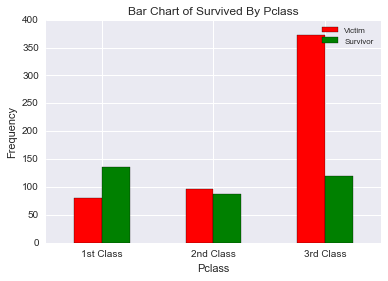

In [11]:
pd.crosstab(titanic_data['Pclass'], titanic_data['Survived']).plot(kind='bar', color=['red','green'])
ax = plt.gca()
ax.set_xticklabels(('1st Class','2nd Class', '3rd Class'),rotation=0)
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title("Bar Chart of Survived By Pclass")
plt.legend(('Victim','Survivor'),prop={'size': 8})

plt.show()

From the above plot, the victims in the third class is much more than the other two classes. The number of survivors in the first class is the largest.

### Age VS Survived

In [12]:
corr_age = correlation(titanic_data['Age'],titanic_data['Survived'])

print "The Pearson's r between Age and Survived is {}.".format(corr_age)

The Pearson's r between Age and Survived is -0.0698085152871.


I split the data in colume Age to two groups -- survived and unservived -- to analyze the correlation between these two features.

In [13]:
survived_by_age = titanic_data['Age'][titanic_data['Survived'] == 1]
unsurvived_by_age = titanic_data['Age'][titanic_data['Survived'] == 0]

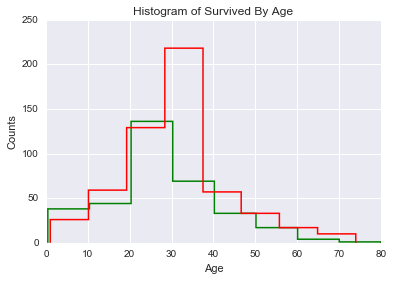

In [14]:
data_age = pd.Series(survived_by_age)
data_age_u = pd.Series(unsurvived_by_age)
fig,ax = plt.subplots()
ax.hist(data_age.dropna(),bins=8,histtype='step', color ='green', label = 'Survivor',linewidth=1.5)
ax.hist(data_age_u.dropna(),bins=8,histtype='step', color = 'red', label = 'Victim',linewidth=1.5)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title("Histogram of Survived By Age")
plt.show()

From the above plot, Age in 20-40 has many survivors as well as the victims. The correlation between Age and Survived is slight.

### SibSp VS Survived

In [15]:
corr_sibsp = correlation(titanic_data['SibSp'],titanic_data['Survived'])

print "The Pearson's r between SibSp and Survived is {}.".format(corr_sibsp)

The Pearson's r between SibSp and Survived is -0.0353224988857.


I split the data in colume SibSp to two groups -- survived and unservived -- to analyze the correlation between these two features.

In [16]:
survived_by_sibsp = titanic_data['SibSp'][titanic_data['Survived'] == 1]
unsurvived_by_sibsp = titanic_data['SibSp'][titanic_data['Survived'] == 0]

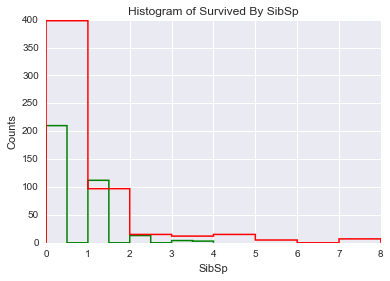

In [17]:
data_sibsp = pd.Series(survived_by_sibsp)
data_sibsp_u = pd.Series(unsurvived_by_sibsp)
fig,ax = plt.subplots()
ax.hist(data_sibsp.dropna(),bins=8,histtype='step', color ='green', label = 'Survivor',linewidth=1.5)
ax.hist(data_sibsp_u.dropna(),bins=8,histtype='step', color = 'red', label = 'Victim',linewidth=1.5)
plt.xlabel('SibSp')
plt.ylabel('Counts')
plt.title("Histogram of Survived By SibSp")
plt.show()

From the above plot, SibSp in 0-2 has many survivors as well as the victims. The majority of the passengers are in this range. SibSp has little correlation with the feature Survived.

### Parch VS Survived

In [18]:
corr_parch = correlation(titanic_data['Parch'],titanic_data['Survived'])

print "The Pearson's r between Parch and Survived is {}.".format(corr_parch)

The Pearson's r between Parch and Survived is 0.0816294070835.


I split the data in colume Parch to two groups -- survived and unservived -- to analyze the correlation between these two features.

In [19]:
survived_by_parch = titanic_data['Parch'][titanic_data['Survived'] == 1]
unsurvived_by_parch = titanic_data['Parch'][titanic_data['Survived'] == 0]

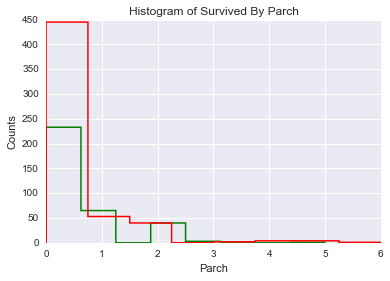

In [20]:
data_parch = pd.Series(survived_by_parch)
data_parch_u = pd.Series(unsurvived_by_parch)
fig,ax = plt.subplots()
ax.hist(data_parch.dropna(),bins=8,histtype='step', color ='green', label = 'Survivor',linewidth=1.5)
ax.hist(data_parch_u.dropna(),bins=8,histtype='step', color = 'red', label = 'Victim',linewidth=1.5)

plt.xlabel('Parch')
plt.ylabel('Counts')
plt.title("Histogram of Survived By Parch")
plt.show()

From the above plot, Parch in 0-2 has the largest number of survivors as well as the victims. Parch has little correlation with the feature Survived.

### Fare VS Survived

In [21]:
corr_fare = correlation(titanic_data['Fare'],titanic_data['Survived'])

print "The Pearson's r between Fare and Survived is {}.".format(corr_fare)

The Pearson's r between Fare and Survived is 0.257306522385.


The data in colume Fare is a little bit scattered, so I use boxplot to analyze the data.

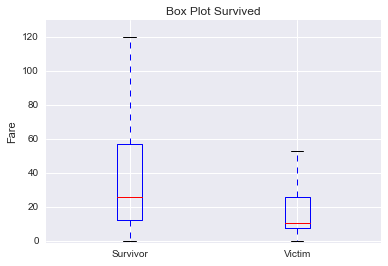

In [22]:
box = plt.figure() 
plt.ylim(-1,130)
ax = box.add_subplot(111)
survivor_df = titanic_data['Fare'][titanic_data['Survived'] == 1] 
victim_df = titanic_data['Fare'][titanic_data['Survived'] == 0]  
x_labels = ['Survivor','Victim']  
ax.boxplot([survivor_df,victim_df], labels = x_labels)  
ax.set_ylabel('Fare') 
ax.set_title('Box Plot Survived') 

plt.show()

From the above boxplot, the 25th percentile, the 50th percentile, the 75th percentile and the max value of the fare of the survivor are all larger than the victim's. Fare has a positive correlation with Survived feature.

### Sex VS Survived

The values in Age colume is string. I'd like to transfer the string value to number to help me analyze the dataset.

Define a function to transfer sex category to number 0 or 1.

In [23]:
def transfer_sex_to_number(sex):
    if sex == 'male':
        return 0
    if sex == 'female':
        return 1

In [24]:
transfered_sex = titanic_data['Sex'].apply(transfer_sex_to_number)

In [25]:
corr_sex = correlation(transfered_sex,titanic_data['Survived'])

print "The Pearson's r between Sex and Survived is {}.".format(corr_sex)

The Pearson's r between Sex and Survived is 0.543351380658.


I will calculate the survival rate of different sex to see if there exists correlation bewteen Sex and Survived feature.

In [26]:
print "------ Sex VS Survived ------"

print "Total Passengers by Sex:"
print titanic_data['Sex'].value_counts()

print "Survived Paseengers by Sex:"
print titanic_data.groupby('Sex')['Survived'].sum()

print "Survival Rate by Sex:"
print titanic_data.groupby('Sex')['Survived'].sum() / titanic_data['Sex'].value_counts()

------ Sex VS Survived ------
Total Passengers by Sex:
male      577
female    314
Name: Sex, dtype: int64
Survived Paseengers by Sex:
Sex
female    233
male      109
Name: Survived, dtype: int64
Survival Rate by Sex:
female    0.742038
male      0.188908
dtype: float64


From the above analysis, the female passengers' survival rate which is 74.20% is much higher than the male passengers' survival rate 18.89%. Sex has a strong correlation with Survived feature.

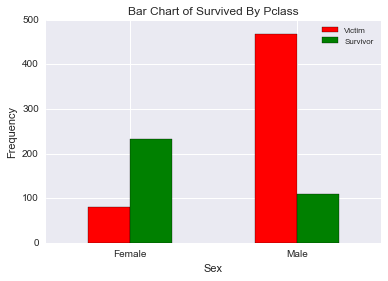

In [27]:
pd.crosstab(titanic_data['Sex'], titanic_data['Survived']).plot(kind='bar', color=['red','green'])
ax = plt.gca()
ax.set_xticklabels(('Female','Male'),rotation=0)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title("Bar Chart of Survived By Pclass")
plt.legend(('Victim','Survivor'),prop={'size': 8})

plt.show()

From the above plot, male has more victims than female and has less survivors than female.

# 4. Conclusion

- Based on the above investigation, the final conculsion would be : Females would have more survival rate than males. Passengers who stayed in first class cabin would have the highest survival rate among all classes. The passengers who paid the high price fee have larger survival rate than those who paid low price fee. Survival rate has little relationship with Age, SibSp and Parch. The dataset is small and many values are lost, otherwise the accuracy of the analysis can be improved.